In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from IPython.display import Image

In [2]:
class BatsmanWorkflow(TypedDict):
    balls: int
    fours: int
    sixes: int
    score: int
    sr: float
    bp: float
    bpb: float
    summary: str

In [3]:
# defining graph:
graph = StateGraph(BatsmanWorkflow)

In [ ]:
def Strike_rate(state: BatsmanWorkflow):
    sr = round((state["score"] / state["balls"])* 100, 2)  
    return {"sr": sr}


In [ ]:

def Bals_per_boundry(state: BatsmanWorkflow):
    bpb = round(state["balls"] / (state["fours"] + state["sixes"]), 2)
    return {"bpb": bpb}


In [ ]:

def Boundry_percentage(state: BatsmanWorkflow):
    bp = round(((state["fours"]*4) + (state["sixes"]*6)) / state["score"], 2)
    return {"bp": bp}

In [ ]:
def Summary(state: BatsmanWorkflow):
    summary = f"""
        Strikers rate is: {state["sr"]}\n
        Balls per boundry is: {state["bpb"]}\n
        Boundry percentage is: {state["bp"]}\n
        """
    return {"summary": summary}

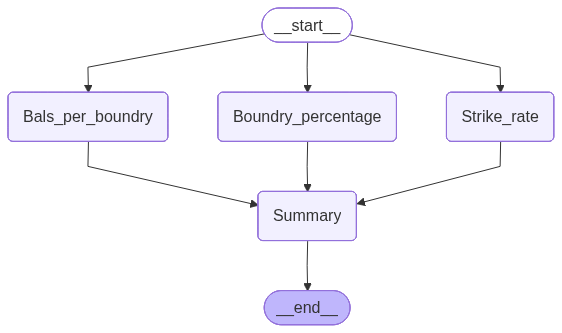

In [8]:
# graph nodes:
graph.add_node("Strike_rate", Strike_rate)
graph.add_node("Boundry_percentage", Boundry_percentage)
graph.add_node("Bals_per_boundry", Bals_per_boundry)
graph.add_node("Summary", Summary)

# graph edges:
graph.add_edge(START, "Strike_rate")
graph.add_edge(START, "Boundry_percentage")
graph.add_edge(START, "Bals_per_boundry")

graph.add_edge("Strike_rate", "Summary")
graph.add_edge("Boundry_percentage", "Summary")
graph.add_edge("Bals_per_boundry", "Summary")
graph.add_edge("Summary", END)



# compile graph:
workflow = graph.compile()
Image(workflow.get_graph().draw_mermaid_png())

In [9]:
# input from the user:
balls = int(input("Balls played: "))
fours = int(input("Fours scored: "))
sixes = int(input("Sixes scored: "))
score = int(input("Total score: "))

dict_to_pass = {"balls": balls,
                "fours": fours,
                "sixes": sixes,
                "score": score
                }

In [10]:
# run graph:
result = workflow.invoke(dict_to_pass)

In [11]:
print(result["summary"])


        Strikers rate is: 666.67

        Balls per boundry is: 2.14

        Boundry percentage is: 0.34

        
